# STINTSY MACHINE PROJECT

## INTRODUCTION

## DESCRIPTION OF THE DATASET

The dataset used for this research, the [Sleep Efficiency Dataset](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency), is sourced from Kaggle.

The dataset contains information about a group of test subjects and their sleep patterns. Each respondent is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.
<br>


**Variable Description** <br>

**Identifier**

1. ID - unique identifier for each participant

**Demographic**

2. Age - age of the respondent
3. Gender - gender of the respondent

**Sleep data**

4. Bedtime - date & time the respondent slept (format in 24-hour format)
5. Wakeup time - date & time the respondent woke up (format in 24-hour format)
6. Sleep duration - total amount of time the respondent slept (in hours)
7. Sleep efficiency - a measure of the proportion of time in bed spent asleep
8. Awakenings - no. of times the respondent wakes up during the night

**Sleep Percentage**

9. REM sleep percent - percentage of total sleep time spent in REM sleep

**What is REM sleep?**

- REM (Rapid Eye Movement) sleep is a phase of the sleep cycle characterized by rapid eye movements, vivid dreaming, muscle paralysis to prevent physical activity during dreams, increased brain activity, and irregular heart rate and breathing. It's one of the two main categories of sleep, alternating with non-REM sleep throughout the night in approximately 90-minute cycles. REM sleep is essential for memory consolidation, emotional processing, and overall cognitive function, contributing to feeling refreshed and alert upon waking. Disruptions in REM sleep can lead to sleep disorders like REM sleep behavior disorder and narcolepsy.

10. Deep sleep percent - percentage of total sleep time spent in deep sleep

**What is deep sleep?**
- Deep sleep, also known as slow-wave sleep (SWS), is the most restorative stage of the sleep cycle, occurring in Stage 3 of non-REM sleep. It features slow brain waves, profound muscle relaxation, limited dreaming, and is challenging to awaken from. Deep sleep is crucial for physical restoration, memory consolidation, immune function, and feeling refreshed upon waking. It's most abundant in the early part of the night and becomes less prevalent as the night progresses.

11. Light sleep percent - percentage of total sleep time spent in light sleep

**What is light sleep?**
- Light sleep, often referred to as Stage 1 and Stage 2 of non-REM (NREM) sleep, is characterized by reduced brain activity and muscle tone compared to wakefulness. During these stages, your body is still relatively responsive to external stimuli, and you can be easily awakened. Light sleep typically occurs at the beginning of the sleep cycle and becomes progressively deeper as you transition into deeper NREM stages and ultimately into REM sleep.

**Controllable values**

12. Caffeine consumption - the amount of caffeine consumed in the 24 hours prior to bedtime (in mg)
13. Alcohol consumption - amount of alcohol consumed in the 24 hours prior to bedtime (in oz)
14. Smoking status - does the respondent smokes or not
15. Excercise Frequency - no. of times the respondent exercises each week

## REQUIREMENTS

The requirement of this project is the Sleep_Efficiency.cvs where the dataset is stored.

### Important Libaries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


## DATA CLEANING AND PREPROCESSING

### Reading the Dataset

In [134]:
slpEf_df = pd.read_csv("Sleep_Efficiency.csv")
slpEf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

All of the columns

In [135]:
print(slpEf_df.columns)

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


Here are the first five observation in the dataset.

In [136]:
slpEf_df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### Data Cleaning

#### Look For Null Values

In [137]:
slpEf_df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

Printing of Null Values

In [138]:
nullVal = slpEf_df[["Awakenings", "Caffeine consumption", "Alcohol consumption", "Exercise frequency"]].isnull().any(axis=1)
instanceNull = slpEf_df[nullVal]
instanceNull

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,NaN,50.0,0.0,Yes,3.0
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,NaN,No,2.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,NaN,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,NaN,0.0,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,28,Female,2021-08-11 23:00:00,2021-08-11 07:00:00,8.0,0.90,22,63,15,NaN,75.0,2.0,No,4.0
440,441,28,Female,2021-02-06 21:00:00,2021-02-06 05:00:00,8.0,0.88,22,63,15,0.0,75.0,NaN,Yes,2.0
442,443,27,Female,2021-02-06 01:30:00,2021-02-06 08:30:00,7.0,0.68,23,22,55,1.0,NaN,4.0,No,1.0
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,NaN


Replacing Null Values Under Awakenings Column

In [139]:
awakeningsMean = round(slpEf_df['Awakenings'].mean())
print("The mean of the Awakening Column (Rounded To the Nearest Whole Number): " + str(awakeningsMean))
slpEf_df['Awakenings'] = slpEf_df['Awakenings'].fillna(awakeningsMean)

The mean of the Awakening Column (Rounded To the Nearest Whole Number): 2


Replacing Null Values Under Caffeine Consumption Column

In [140]:
cafConsMean = round(slpEf_df['Caffeine consumption'].mean())
print("The mean of the Caffeine Consumption Column (Rounded To the Nearest Whole Number): " + str(cafConsMean))
slpEf_df['Caffeine consumption'] = slpEf_df['Caffeine consumption'].fillna(cafConsMean)

The mean of the Caffeine Consumption Column (Rounded To the Nearest Whole Number): 24


Replacing Null Values Under Alcohol Consumption Column

In [141]:
alcConsMean = round(slpEf_df['Alcohol consumption'].mean())
print("The mean of the Alcohol Consumption Column (Rounded To the Nearest Whole Number): " + str(alcConsMean))
slpEf_df['Alcohol consumption'] = slpEf_df['Alcohol consumption'].fillna(alcConsMean)

The mean of the Alcohol Consumption Column (Rounded To the Nearest Whole Number): 1


Replacing Null Values Under Exercise Frequency Column

In [142]:
exerFreqMean = round(slpEf_df['Exercise frequency'].mean())
print("The mean of the Awakening Colum (Rounded To the Nearest Whole Number): " + str(exerFreqMean))
slpEf_df['Exercise frequency'] = slpEf_df['Exercise frequency'].fillna(exerFreqMean)

The mean of the Awakening Colum (Rounded To the Nearest Whole Number): 2


After Replacement

In [143]:
slpEf_df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [144]:
instanceNullAfter = slpEf_df.loc[instanceNull.index]
instanceNullAfter

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,24.0,0.0,No,1.0
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,2.0,50.0,0.0,Yes,3.0
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,1.0,No,2.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,24.0,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,24.0,0.0,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,28,Female,2021-08-11 23:00:00,2021-08-11 07:00:00,8.0,0.90,22,63,15,2.0,75.0,2.0,No,4.0
440,441,28,Female,2021-02-06 21:00:00,2021-02-06 05:00:00,8.0,0.88,22,63,15,0.0,75.0,1.0,Yes,2.0
442,443,27,Female,2021-02-06 01:30:00,2021-02-06 08:30:00,7.0,0.68,23,22,55,1.0,24.0,4.0,No,1.0
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,2.0


### Data Preprocessing

#### One Hot Encoding

In [145]:
slpEf_df = pd.get_dummies(slpEf_df, columns=['Smoking status'], prefix='Smoking')
slpEf_df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Smoking_No,Smoking_Yes
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,False,True
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,False,True
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,True,False
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,False,True
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,True,False


Convert the Boolean True and Boolean False to Integer

In [146]:
slpEf_df['Smoking_No'] = slpEf_df['Smoking_No'].astype(int)
slpEf_df['Smoking_Yes'] = slpEf_df['Smoking_Yes'].astype(int)
slpEf_df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Smoking_No,Smoking_Yes
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,0,1
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,1,0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0


#### Conversion of oz (ounce) to ml (mililiters) on Alcohol Consumption

1 oz is approximately 29.5735297 ml

Before Conversion

In [147]:
slpEf_df["Alcohol consumption"]

0      0.0
1      3.0
2      0.0
3      5.0
4      3.0
      ... 
447    0.0
448    0.0
449    3.0
450    0.0
451    0.0
Name: Alcohol consumption, Length: 452, dtype: float64

Conversion of oz to ml

In [148]:
ozMlConversion = 29.5735297
slpEf_df["Alcohol consumption"] = slpEf_df["Alcohol consumption"].apply(lambda x: round(x * ozMlConversion)if pd.notna(x) else x)

After Conversion

In [149]:
slpEf_df["Alcohol consumption"]

0        0
1       89
2        0
3      148
4       89
      ... 
447      0
448      0
449     89
450      0
451      0
Name: Alcohol consumption, Length: 452, dtype: int64

#### Extraction of Hours in DateTime Format of Columns Bedtime and Wakeup Time

In [150]:
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'])
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'])

# Extract hour from Bedtime and Wakeup time
slpEf_df['Bedtime'] = slpEf_df['Bedtime'].dt.strftime('%H:%M')
slpEf_df['Wakeup time'] = slpEf_df['Wakeup time'].dt.strftime('%H:%M')

#Convert back to DateTime format
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'], format='%H:%M')
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'], format='%H:%M')

# Convert Bedtime and Wakeup time to hours since midnight for correlation calculation
slpEf_df['Bedtime Hour'] = slpEf_df['Bedtime'].dt.hour + slpEf_df['Bedtime'].dt.minute / 60
slpEf_df['Wakeup Hour'] = slpEf_df['Wakeup time'].dt.hour + slpEf_df['Wakeup time'].dt.minute / 60

In [151]:
slpTime = ['Bedtime Hour', 'Wakeup Hour', 'Bedtime', 'Wakeup time']
slpEf_df[slpTime]

,Bedtime Hour,Wakeup Hour,Bedtime,Wakeup time
0,1.0,7.0,1900-01-01 01:00:00,1900-01-01 07:00:00
1,2.0,9.0,1900-01-01 02:00:00,1900-01-01 09:00:00
2,21.5,5.5,1900-01-01 21:30:00,1900-01-01 05:30:00
3,2.5,8.5,1900-01-01 02:30:00,1900-01-01 08:30:00
4,1.0,9.0,1900-01-01 01:00:00,1900-01-01 09:00:00
...,...,...,...,...
447,22.0,5.5,1900-01-01 22:00:00,1900-01-01 05:30:00
448,21.0,3.0,1900-01-01 21:00:00,1900-01-01 03:00:00
449,23.0,7.5,1900-01-01 23:00:00,1900-01-01 07:30:00
450,21.0,4.0,1900-01-01 21:00:00,1900-01-01 04:00:00


## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

#### Numerical

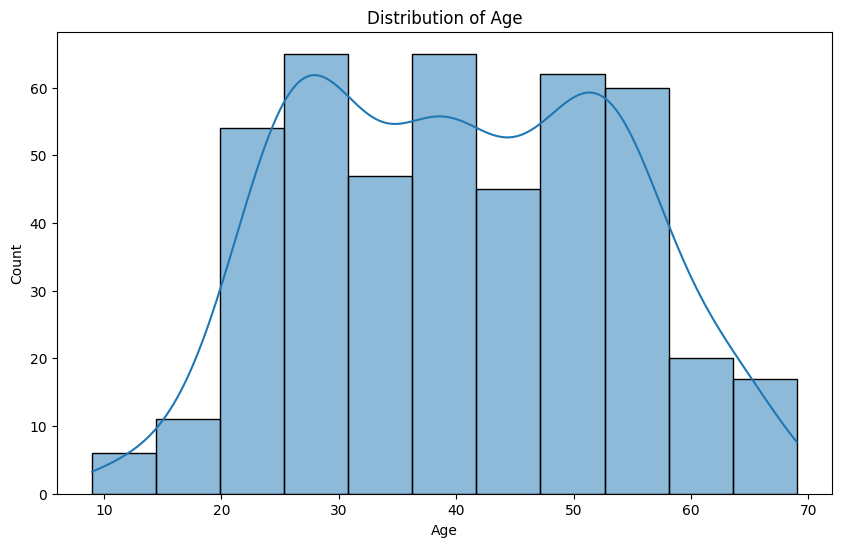

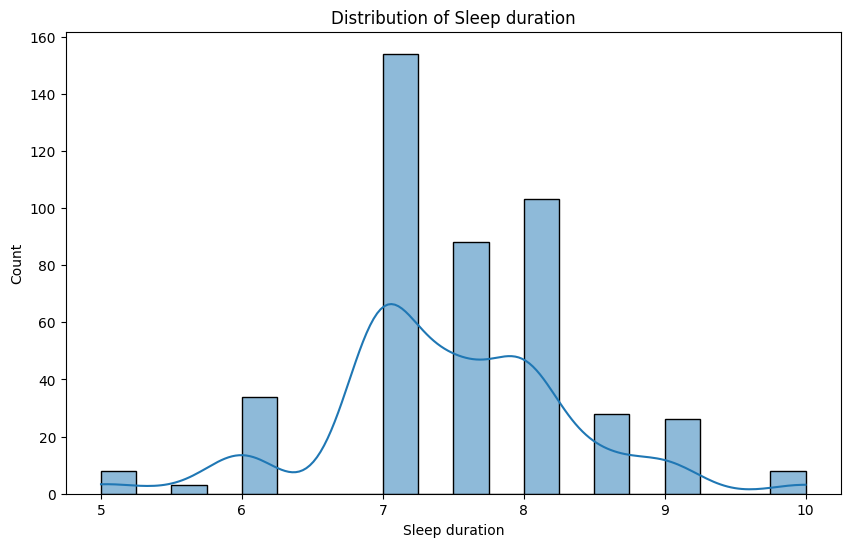

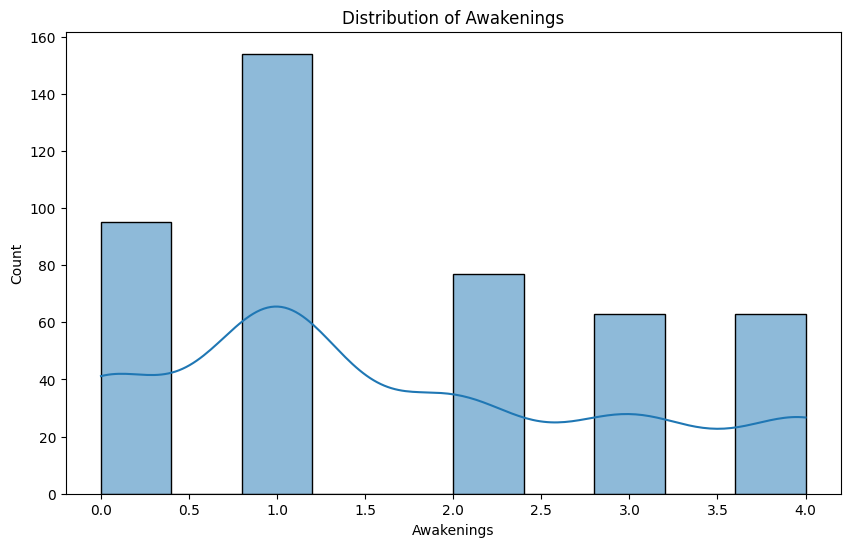

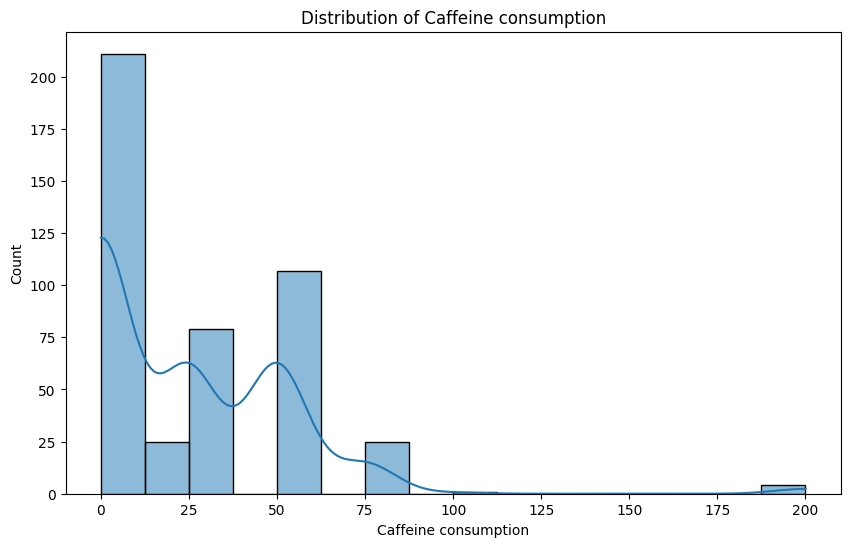

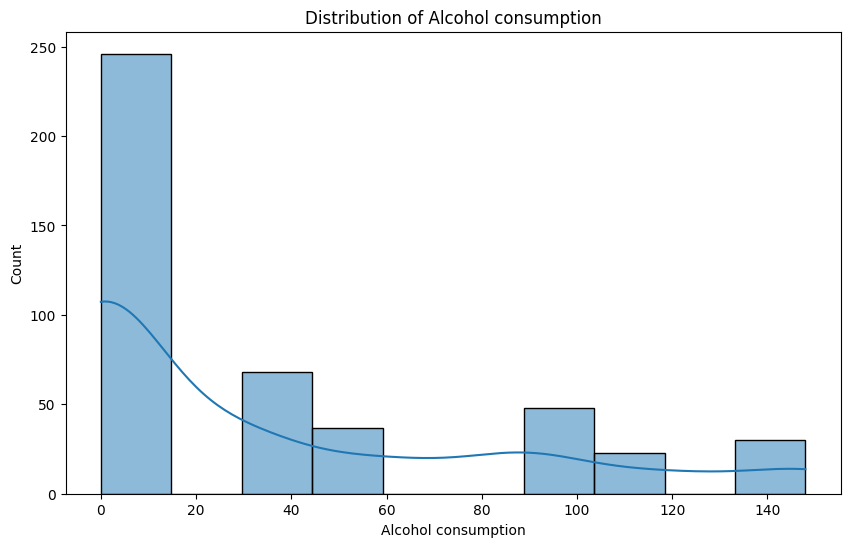

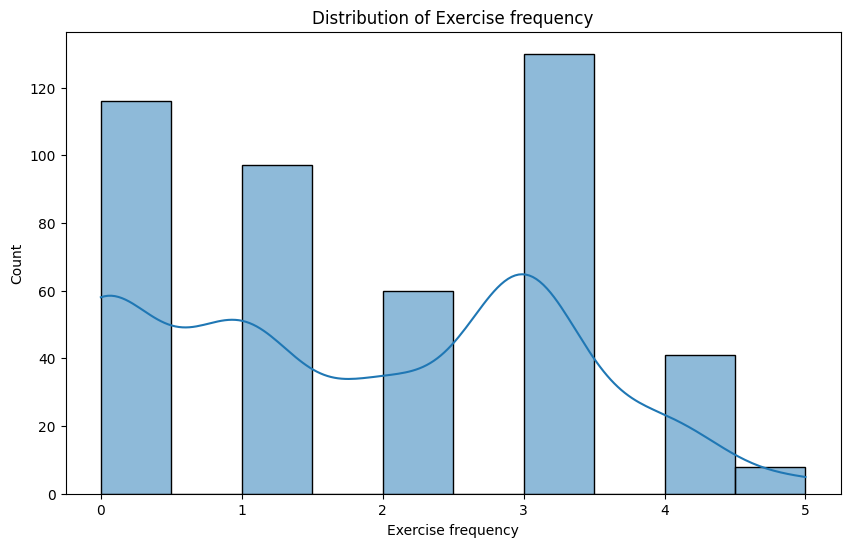

In [152]:
numerical_columns = ['Age', 'Sleep duration', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
for column in numerical_columns:
    plt.figure(figsize=(10, 6)) 
    sns.histplot(slpEf_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

#### Categorical

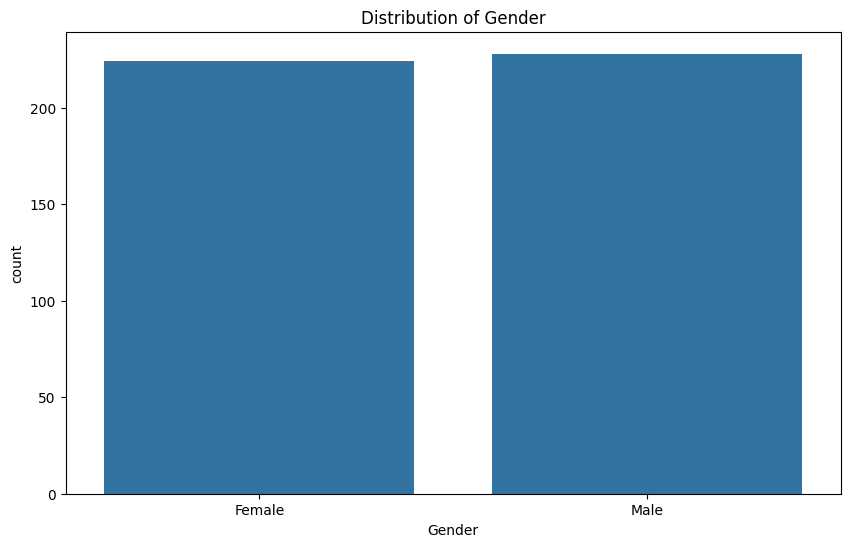

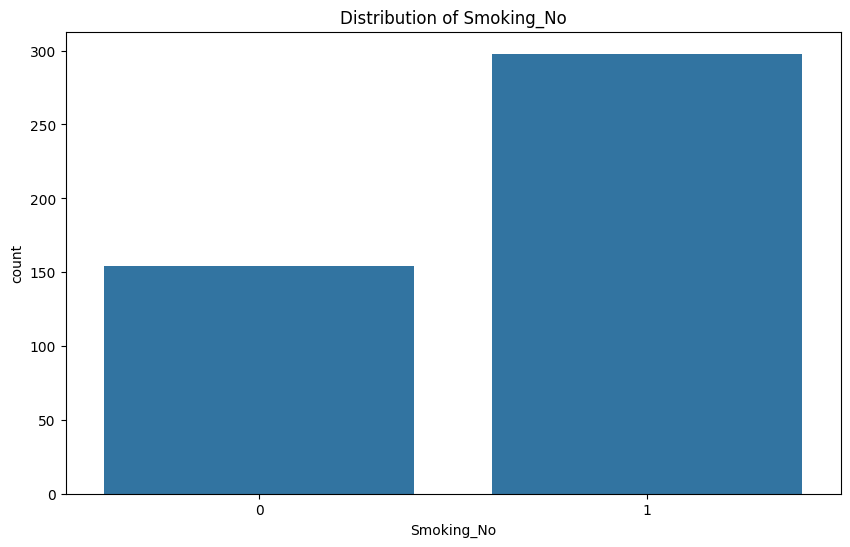

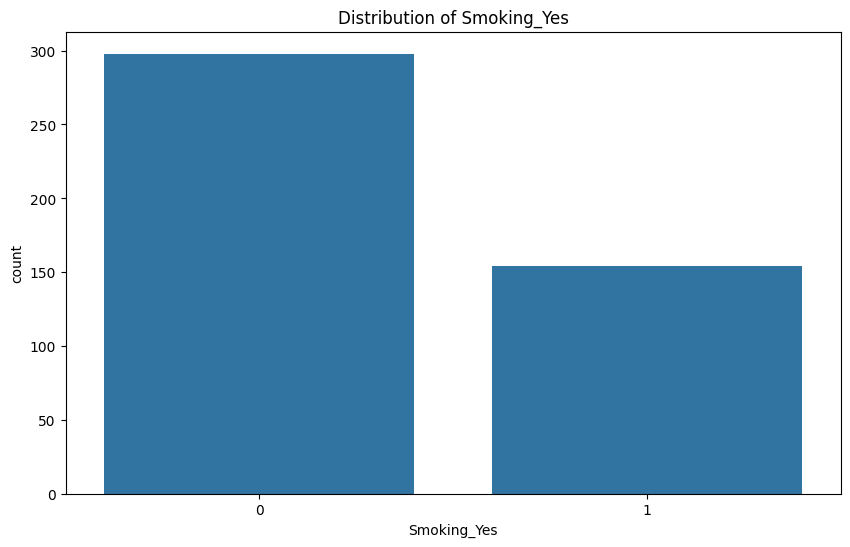

In [153]:
categorical_columns = ['Gender', 'Smoking_No', 'Smoking_Yes']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=slpEf_df)
    plt.title(f'Distribution of {column}')
    plt.show()

### Bivariate Analysis

#### Sleep Duration vs Age

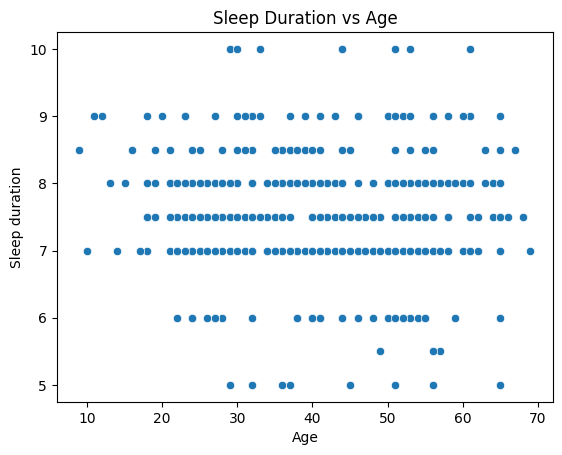

In [154]:
sns.scatterplot(x='Age', y='Sleep duration', data=slpEf_df)
plt.title('Sleep Duration vs Age')
plt.show()

#### Sleep Duration vs Smoking_No

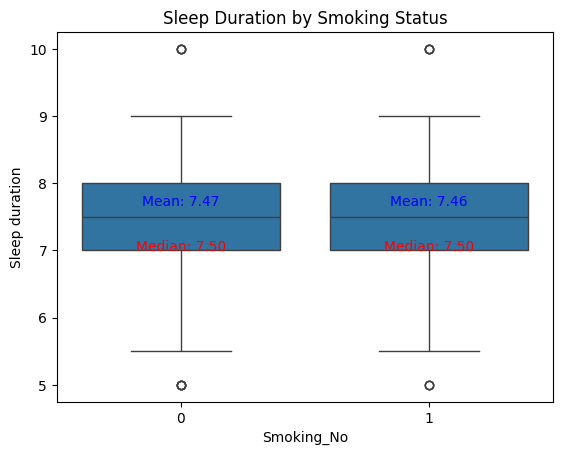

In [155]:
sns.boxplot(x='Smoking_No', y='Sleep duration', data=slpEf_df)
plt.title('Sleep Duration by Smoking Status')

mean_values = slpEf_df.groupby('Smoking_No')['Sleep duration'].mean()
median_values = slpEf_df.groupby('Smoking_No')['Sleep duration'].median()

for i, status in enumerate(mean_values.index):
    plt.text(i, mean_values[status] + 0.2, f'Mean: {mean_values[status]:.2f}', color='blue', ha='center')
    plt.text(i, median_values[status] - 0.5, f'Median: {median_values[status]:.2f}', color='red', ha='center')

plt.show()

### Time-Based Analysis

Median Bedtime: 02:30:00
Median Wakeup Time: 07:00:00


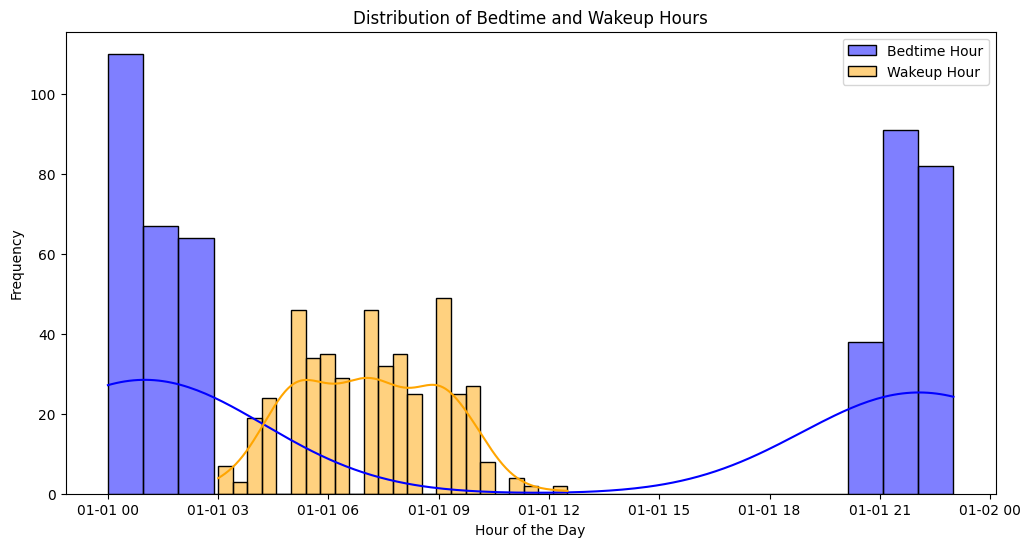

In [156]:
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'], format='%H:%M')
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'], format='%H:%M')

# Calculate median for Bedtime and Wakeup time
median_bedtime = slpEf_df['Bedtime'].median()
median_wakeup = slpEf_df['Wakeup time'].median()

print("Median Bedtime:", median_bedtime.time())
print("Median Wakeup Time:", median_wakeup.time())

# Plot bedtime and wakeup time hours
plt.figure(figsize=(12, 6))
sns.histplot(slpEf_df['Bedtime'], bins=24, kde=True, color='blue', label='Bedtime Hour')
sns.histplot(slpEf_df['Wakeup time'], bins=24, kde=True, color='orange', label='Wakeup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Bedtime and Wakeup Hours')
plt.legend()
plt.show()



### Correlational Analysis

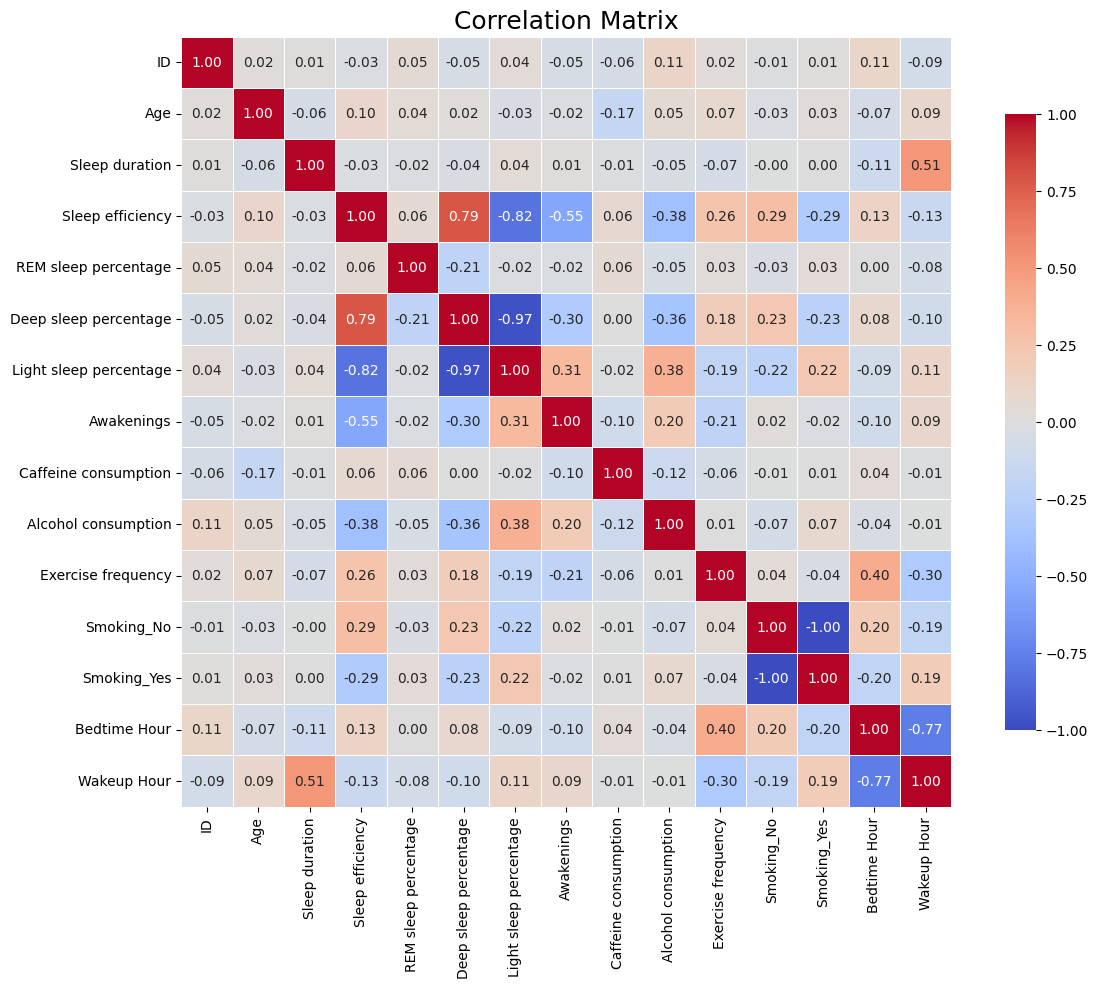

In [157]:
numeric_df = slpEf_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10)) 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', fontsize=18)

plt.show()

#### Multivariate Analysis

## INITIAL MODEL TRAINING

### Linear Regression

Loading the Data in X and y variables

In [158]:
X_linear = slpEf_df[['Sleep duration', 'Deep sleep percentage', 'Light sleep percentage','REM sleep percentage',  'Awakenings', 
              'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Smoking_No', 
              'Bedtime Hour', 'Wakeup Hour', 'Age']]
y_linear = slpEf_df['Sleep efficiency']

Splitting the Data into Training Set and Test Set

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

Training the Model

In [160]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

Predictions

In [161]:
y_pred = linReg.predict(X_test)

Evaluation

In [162]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R²:', r2)
print('RMSE:', rmse)
print("Intercept:", linReg.intercept_)
print("Coefficients:", linReg.coef_)
print("Feature Names:", X.columns)

R²: 0.7919456679609593
RMSE: 0.062238004235946574
Intercept: 0.6942600503736861
Coefficients: [ 5.84526409e-03  1.72517295e-03 -4.00263663e-03  2.27746369e-03
 -3.37807509e-02  1.14227374e-04 -1.47062404e-04  4.26294339e-03
  3.82881611e-02  5.02056988e-05 -6.70340306e-04  8.72857719e-04]
Feature Names: Index(['Sleep duration', 'Deep sleep percentage', 'Light sleep percentage',
       'REM sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Exercise frequency', 'Smoking_No',
       'Bedtime Hour', 'Wakeup Hour', 'Age'],
      dtype='object')


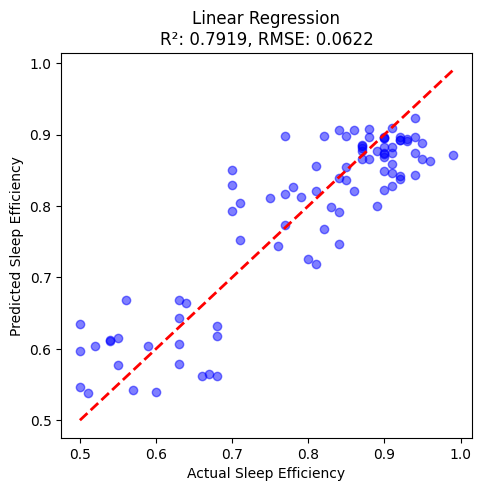

In [163]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Linear Regression\nR²: {:.4f}, RMSE: {:.4f}".format(
    r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))))
plt.show()

### Log-Log Regression

Pre-Processing

In [164]:
slpEf_dfLog = slpEf_df.replace(0, 0.001)  # Add a small constant to avoid log(0)

Log-Transforming the Features and Loading the Data in X and y variables

In [165]:
X_log = np.log(slpEf_dfLog[['Sleep duration', 'Deep sleep percentage', 'Light sleep percentage',
                     'REM sleep percentage', 'Awakenings', 'Caffeine consumption',
                     'Alcohol consumption', 'Exercise frequency', 'Smoking_No',
                     'Bedtime Hour', 'Wakeup Hour', 'Age']])

y_log = np.log(slpEf_dfLog['Sleep efficiency'])

Splitting the Data into Training Set and Test Set

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Model

In [167]:
log_log_model = LinearRegression()
log_log_model.fit(X_train, y_train)

LinearRegression()

Predictions

In [168]:
y_pred = log_log_model.predict(X_test)

Evaluation

In [169]:
# Calculate R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("R²:", r2)
print("RMSE:", rmse)
print("Intercept:", log_log_model.intercept_)
print("Coefficients:", log_log_model.coef_)

R²: 0.7919456679609593
RMSE: 0.062238004235946574
Intercept: 0.6942600503736861
Coefficients: [ 5.84526409e-03  1.72517295e-03 -4.00263663e-03  2.27746369e-03
 -3.37807509e-02  1.14227374e-04 -1.47062404e-04  4.26294339e-03
  3.82881611e-02  5.02056988e-05 -6.70340306e-04  8.72857719e-04]


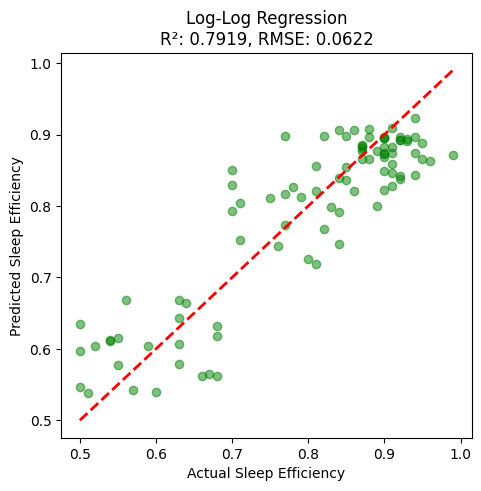

In [170]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Log-Log Regression\nR²: {:.4f}, RMSE: {:.4f}".format(
    r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))))
plt.show()

### Random Forest Regression

Loading the Data in X and y variables

In [171]:
X_rf = slpEf_df[['Sleep duration', 'Deep sleep percentage', 'Light sleep percentage',
               'REM sleep percentage', 'Awakenings', 'Caffeine consumption',
               'Alcohol consumption', 'Exercise frequency', 'Smoking_No',
               'Bedtime Hour', 'Wakeup Hour', 'Age']]
y_rf = slpEf_df['Sleep efficiency']

Splitting the Data into Training Set and Test Set

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Model

In [173]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predictions

In [174]:
y_pred = rf_model.predict(X_test)

Evaluation

In [175]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)

feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)


R²: 0.8469737967338662
RMSE: 0.05337651045293127
Feature Importances:
                    Feature  Importance
2   Light sleep percentage    0.370044
1    Deep sleep percentage    0.360416
4               Awakenings    0.124800
11                     Age    0.037362
8               Smoking_No    0.028553
6      Alcohol consumption    0.013812
3     REM sleep percentage    0.013604
7       Exercise frequency    0.012669
10             Wakeup Hour    0.012095
9             Bedtime Hour    0.011842
0           Sleep duration    0.008882
5     Caffeine consumption    0.005921


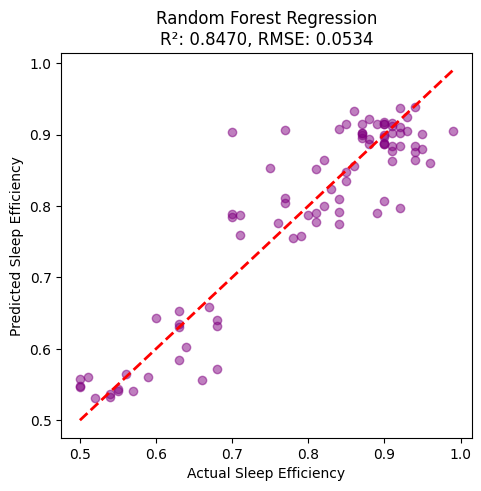

In [176]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred, alpha=0.5, color="purple")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Random Forest Regression\nR²: {:.4f}, RMSE: {:.4f}".format(
    r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))))
plt.show()

## ERROR ANALYSIS

Bias and Variance

In [177]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a function to compute bias and variance approximations
def bias_variance_analysis(model, X, y, cv=5):
    # Cross-validate and get predictions on each fold
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE scores to RMSE

    # Calculate bias as the mean RMSE
    bias = np.mean(rmse_scores)
    # Calculate variance as the standard deviation of RMSE across folds
    variance = np.std(rmse_scores)
    
    return bias, variance

# Calculate for Linear Regression
linear_model_bias, linear_model_variance = bias_variance_analysis(linReg, X_linear, y_linear)

# Calculate for Log-Log Regression
log_linear_model_bias, log_linear_model_variance = bias_variance_analysis(log_log_model, X_log, y_log)

# Calculate for Random Forest Regression
rf_model_bias, rf_model_variance = bias_variance_analysis(rf_model, X_rf, y_rf)

# Display results
print("Bias and Variance Analysis:")
print(f"Linear Regression - Bias: {linear_model_bias:.4f}, Variance: {linear_model_variance:.4f}")
print(f"Log-Log Regression - Bias: {log_linear_model_bias:.4f}, Variance: {log_linear_model_variance:.4f}")
print(f"Random Forest Regression - Bias: {rf_model_bias:.4f}, Variance: {rf_model_variance:.4f}")


Bias and Variance Analysis:
Linear Regression - Bias: 0.0615, Variance: 0.0022
Log-Log Regression - Bias: 0.0868, Variance: 0.0041
Random Forest Regression - Bias: 0.0514, Variance: 0.0019


## IMPROVING MODEL PERFORMANCE

## MODEL PERFORMANCE SUMMARY

## INSIGHTS AND CONCLUSION

## REFERENCES